Moment vs T and general functions

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.optimize as scop
import csv
import matplotlib as mpl
import seaborn as sns
#import Stoner

#THIS BLOCK Sanitises THE DATA AND CONVERTS IT FROM CGS TO SI UNITS IF REQUIRED 


#Filepath where the point the test datafile exists in so it can be accessed
filepath = "C:/Users/TXB909/Documents/strain-cell/PPMS_Data_and_Plotting/Data/NbTi/"

file = "0003.csv"

FILEANDPATH=filepath+file

#print(FILEANDPATH)

Labels = ['Time Stamp (sec)', 'Temperature (K)', 'Magnetic Field (Oe)', 'Moment (emu)', 'Chamber Temp (K)', 'Average Temp (K)' ]
#print(FILEANDPATH)


#The filetypes from a PPMS cryostat have a huge amount of non delimeted information at the start, this throws an error when 
#accessed using the csv pandas function so this try and except loop finds the headers as they are in csv format 
index_of_headers = 0
for i in range(100):
    try:
        df_raw_data = pd.read_csv(FILEANDPATH, sep=",", skiprows=i, encoding='unicode_escape')
        print("headers start on line", i,)
        #make a note of when headers start, need to +1 as we will skip this many rows later and the first one that works is 
        # found not to format the columns correctly
        index_of_headers = int(i+1)
        break
    except:
        None
        #print("headers don't start on line", i,)
    
print(index_of_headers)

#new dataframe using the index for headers we found
df_raw_data = pd.read_csv(FILEANDPATH, sep=",", skiprows= index_of_headers, encoding='unicode_escape')


#drop any rows containing all NaN's as these are not useful, we use 'all' not 'any' as most columns have at least 1 NaN
df_sanitised_once_data = df_raw_data.dropna(axis = 1, how = 'all', inplace = False)

''' can sanitise again to make and NaN values the previous using .ffill, can make the graph pretty ugly and wrong, but it does make the lines join up, if you care'''
#df_sanitised_once_data = df_raw_data.ffill()


'''need to have a part here that gets the time stamp column and sets it to 0 each time!'''

#Take information such as if data should be left as cgs or converted to si or if the sample was field cooled or zero field cooled for 
#plotting titles of the graphs
fc_or_zfc = 'zfc'
fc_or_zfc = fc_or_zfc.upper()
cgs_or_si = 'cgs'
field = '0.1T'

# Display the filtered dataframe


start_time = df_sanitised_once_data.loc[0,'Time Stamp (sec)']
#print(start_time)
#print(df_sanitised_once_data['Time Stamp (sec)'])
#df_sanitised_once_data = df_sanitised_once_data['Time Stamp (sec)']-29491894

if cgs_or_si.lower() == "cgs":
    print("CGS, units accepted")
    df_sanitised_cgs =df_sanitised_once_data.copy()
    df_name = df_sanitised_cgs
elif cgs_or_si.lower() == "si":
    print("SI, units accepted")
    
    #create a new df containing the sanitised data in correct units
    df_sanitised_si =df_sanitised_once_data.copy()
    df_sanitised_si['Magnetic Field (Oe)']=df_sanitised_si['Magnetic Field (Oe)']*0.0001
    df_sanitised_si['Moment (emu)']=df_sanitised_si['Moment (emu)']*10**(-3)

    '''More variables can be placed here and then renamed below if used, so far only M-field and Moment have been plotted by me'''

    #rename column names to reflect the new units
    df_sanitised_si.rename(columns ={"Magnetic Field (Oe)": "Magnetic Field (T)", "Moment (emu)":"Moment (Am^2)"}, inplace = True)
    df_name = df_sanitised_si
else: 
    print("Invalid Input. Try again")

print(f"Remaining Column Headers are: {df_name.columns}")

#The below is to put limits on the plots for temperature, comment out if you want the full plot
lower_temp = 0
higher_temp = 20
df_temperature_range = df_name[(df_name['Temperature (K)'] >= lower_temp) & (df_name['Temperature (K)'] <= higher_temp)]


#print(f"{df_raw_data.columns}")

#df_name


headers start on line 29
30
CGS, units accepted
Remaining Column Headers are: Index(['Comment', 'Time Stamp (sec)', 'Temperature (K)', 'Magnetic Field (Oe)',
       'Moment (emu)', 'M. Std. Err. (emu)', 'Transport Action',
       'Averaging Time (sec)', 'Frequency (Hz)', 'Peak Amplitude (mm)',
       'Center Position (mm)', 'Coil Signal' (mV)', 'Coil Signal" (mV)',
       'Range (mV)', 'M. Quad. Signal (emu)', 'M. Raw' (emu)', 'M. Raw" (emu)',
       'Min. Temperature (K)', 'Max. Temperature (K)', 'Min. Field (Oe)',
       'Max. Field (Oe)', 'Mass (grams)', 'Motor Lag (deg)', 'Pressure (Torr)',
       'VSM Status (code)', 'Motor Status (code)', 'Measure Status (code)',
       'Measure Count', 'System Temp. (K)', 'Temp. Status (code)',
       'Field Status (code)', 'Chamber Status (code)', 'Motor Current (amps)',
       'Motor Heatsink Temp. (C)'],
      dtype='object')


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.pyplot import figure

#THIS BLOCK CONTAINS FUNCTIONS USED FOR PLOTTING 


#function that plots the desired data, x vs y. Can use this function to handle several common plot requests 
def plot_data(df, x_column_title, y_column_title, title):
    x = df.loc[:,x_column_title]
    y = df.loc[:,y_column_title]
    sorted_df = df.sort_values(by=x_column_title)
    #print(sorted_df)
    x_sorted = sorted_df.loc[:,x_column_title]
    y_sorted = sorted_df.loc[:,y_column_title]
    fig = figure(figsize=(18,10))

    plt.scatter(x, y, s=10, 
                #c='r', 
                  facecolors='none', edgecolors= 'b', label = 'Data Points')
    #plt.plot(x, y, c='r', linewidth=0.8)
    plt.title(title)
    plt.xlabel(x_column_title)
    plt.ylabel(y_column_title)
    plt.grid('both')
    plt.legend()
    plt.show()

#several other functions to plot the requested two variables!

def plot_mom_vs_temp(df, sample, field, fc_or_zfc):
    #use a try except block to allow the function to deal with data in either form
    for i in [1]:
        try: 
            title =f"Moment(emu) vs Temperature(K) for {sample} at {field}, {fc_or_zfc}"
            plot_data(df, 'Temperature (K)', 'Moment (emu)', title)
        except: 
            print('error')
            '''
            title=f"Moment(Am^2) vs Temperature(K) for {sample} at {field}, {fc_or_zfc}"
            plot_data(df,'Temperature (K)', 'Moment (Am^2)', title)
'''
def plot_mom_vs_field(df, sample, field, fc_or_zfc):
    for i in [1]:
        try: 
            title =f"Moment(emu) vs Magnetic Field(Oe) for {sample} at {field}, {fc_or_zfc}"
            plot_data(df, 'Magnetic Field (Oe)','Moment (emu)', title)
        except: 
            title=f"Moment(Am^2) vs Magnetic Field(T) for {sample} at {field}, {fc_or_zfc}"
            plot_data(df, 'Magnetic Field (T)','Moment (Am^2)', title)
    

    '''non completed functions below'''
def plot_rawmag_vs_T(df, sample, field, fc_or_zfc):
    title =f"Raw Magnetisation (emu) vs Temperature (K) for {sample} at {field}, {fc_or_zfc}"
    plot_data(df,'Temperature (K)', 'M. Raw\' (emu)', title)
    


    #work on plotting to beautify them, make them level of a paper, make a separate plot function for pretty plots. make plots readable
    #Take data from additional csv's and overlay them
    #data analysis, use HTE code or plot Low temp behavior 
    #other packages around plotting like seaborn could be good
    #detect anomalies, what do we want from this data.
    #how can this be more flexible?
    #add utility and exercise

In [4]:
#sample = 'NbTi'
#plot_mom_vs_temp(df_temperature_range, sample, field, fc_or_zfc)
import matplotlib.pyplot as plt
#set style as 
plt.style.use('physrev.mplstyle') # Set full path to if physrev.mplstyle is not in the same in directory as the notebook
plt.rcParams['figure.dpi'] = "300"


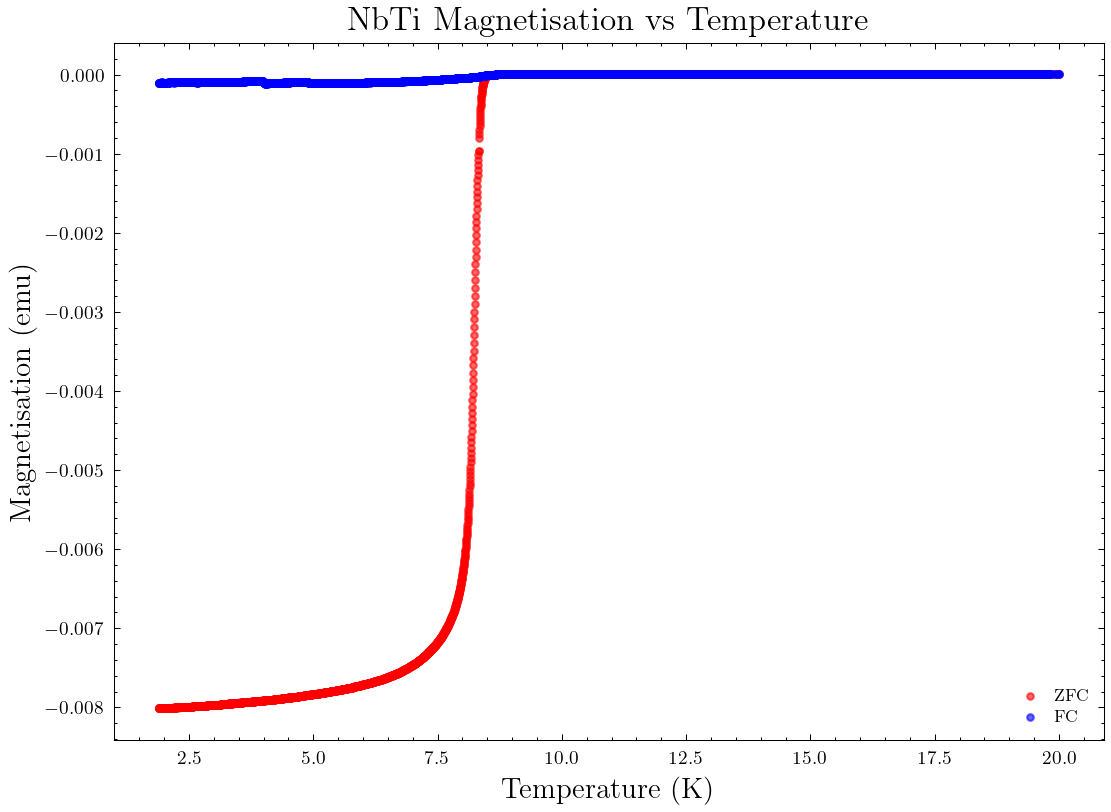

In [11]:

'''
#read in other data by uncommenting this section
df_ref = pd.read_csv("C:/Users/TXB909/Documents/strain-cell/PPMS_Data_and_Plotting/Data/RuCl3/Data/Namba_raw_data.csv", sep=",", encoding='unicode_escape')
x = df_ref.loc[:,'x']
y = df_ref.loc[:,' y']
#namba paper data is in emu/mol so to convert ours we must multiply our data by a conversion factor to get the units as emu/mol
x1 = x
y1 = y
'''
'''
#our data
sample_mass=0.033 #in g
molar_mass = 207.43 #in g/mol
field = 1000 #in oe

x2 = df_temperature_range.loc[:,'Temperature (K)']
y2 = df_temperature_range.loc[:,'Moment (emu)']


fig = figure(figsize=(18,10))

plt.scatter(x1, y1, s=10, 
                c='r', 
                facecolors='b', edgecolors= 'b', label = 'Namba\'s data Points')


plt.scatter(x2, y2, s=10, 
                #c='r', 
                facecolors='r', edgecolors= 'r', label = 'NbTi')
    #plt.plot(x, y, c='r', linewidth=0.8)
    
    
plt.title('NbTi moment vs T')
plt.xlabel('Temperature (K)')
plt.ylabel('Moment (emu)')
plt.grid('both')
plt.legend()
plt.show()

'''
def split_at_temp_jump(df, threshold=-0.1):
    """
    Splits the dataset at the first occurrence of a temperature jump greater than the threshold.
    
    Parameters:
    df (pd.DataFrame): DataFrame containing 'Temperature' and other columns.
    threshold (float): The temperature jump threshold (default = 0.5 K).
    
    Returns:
    df1, df2 (tuple of pd.DataFrame): The two split DataFrames.
    """
    # Compute temperature differences between consecutive rows
    temp_diff = df["Temperature (K)"].diff()

    # Find first row where the temperature jump exceeds the threshold
    jump_index = temp_diff[temp_diff < threshold].index.min()

    # Split the dataset at the detected jump
    df1 = df.loc[:jump_index-1].reset_index(drop=True)  # First part
    df2 = df.loc[jump_index:].reset_index(drop=True)# Second part
    
    

    return df1, df2

fc, zfc = split_at_temp_jump(df_temperature_range)


x1 = fc.loc[:,'Temperature (K)']
y1 = fc.loc[:,'Moment (emu)']

x2 = zfc.loc[:,'Temperature (K)']
y2 = zfc.loc[:,'Moment (emu)']
# Create figure
fig, ax = plt.subplots(figsize=(8, 6), dpi=150)


# Plot FC data (red)
ax.scatter(x1, y1, s=10, color='red', label="ZFC", alpha=0.6)

# Plot ZFC data (blue)
ax.scatter(x2, y2, s=10, color='blue', label="FC", alpha=0.6)

# Labels and formatting
ax.set_title("NbTi Magnetisation vs Temperature", fontsize=16, fontweight='bold')
ax.set_xlabel("Temperature (K)", fontsize=14, fontweight='bold')
ax.set_ylabel("Magnetisation (emu)", fontsize=14, fontweight='bold')


# Show the plot
plt.legend()
plt.show()
